# Gradient Descent and Linear Regression

First consider the 1-D case.  Assume that $x$ is our dependent variable (feature) and $y$ is the variable we wish to predict (predictor).  Given a set of $m$ observations of ($x$, $y$) training values, we wish to find a model that predicts the data.  The linear model uses parameters $\theta_0$ and $\theta_1$ to construct a linear hypothesis:

\begin{align}
h_{\theta}(x) &= \theta_0 + \theta_1 x_1 \\
&= \theta_0 x_0 + \theta_1 x_1 \\
&= \boldsymbol{\theta}^T\ {\bf x} \\
\end{align}

In order to find an optimum model, we minimize the "cost function", $J(\theta)$, w.r.t. $\theta$ where

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 $$.

The goal of regression is to find an optimum fit for a dataset using a linear model.  Here we are summing over the "training set" of $m$ observations.

Gradient descent is a numerical method to find that minimum if $J(\theta)$ by incrementally moving towards the the minimum of the $\theta$ parameter space.  This method assumes that the model is convex in parameter space.  This is done by walking to the minimum by taking steps defined by:

\begin{align}
{\bf \theta} &\leftarrow {\bf \theta} - \alpha \nabla J(\theta) \\
\end{align}

In index notation, 

\begin{align}
\theta_f &\leftarrow \theta_f - \alpha \sum_{f=1}^{N_f} \frac{\partial}{\partial \theta_f} J(\theta)
\end{align}

where

\begin{align}
\frac{\partial}{\partial \theta_f} J(\theta) &=
\frac{1}{m} \sum_{i=1}^{m} \left(  \sum_f \theta_f x_f^{(i)} - y^{(i)} \right) \sum_{f'} \frac{\partial \theta_{f'}}{\partial \theta_f} x_{f'}^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left( \sum_f \theta_f x_f^{(i)} - y^{(i)} \right) \sum_{f'} \delta_{ff'} x_{f'}^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left( \sum_f \theta_f x_f^{(i)} - y^{(i)} \right) x_{f}^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta} \cdot {\bf x}^{(i)} - y^{(i)} \right) x_{f}^{(i)} \\
\end{align}

where ${\bf x}^{(i)} = (x_0^{(i)}, x_1^{(i)})$ for the $i^{th}$ datum.  

## Implementation details

When computing gradient descent in a program such as MATLAB or python, it is customary to represent the data as a Matrix.  The convention that we pick is the training dimension $(i)$ will be denoted by rows and the feature dimension $(j)$ will be determined by columns.  To be clear:

* let $T$ be the number of elements in the training set ( so $T = m$)
* let $F$ be the number of features (including the $x_0=1$ term, so $T = n+1$)

With this convection, ${\bf \theta}$ becomes a $\left(1 \times F\right)$ matrix:

\begin{align}
{\bf \theta} = 
\left( 
\begin{array}{ccc}
\theta_0 & \dots & \theta_n \\
\end{array} 
\right)
\end{align}

and ${\bf X}$ becomes a $\left(T \times F\right)$ matrix of the form (note: for convenience, we denote by $x_0^{(i)} = 1$):

\begin{align}
{\bf X} = 
\left( 
\begin{array}{ccc}
x_0^{(1)} & x_1^{(1)} & \dots  & x_n^{(1)}\\
x_0^{(2)} & x_1^{(2)} & \dots  & x_n^{(2)}\\
\vdots    & \vdots    & \vdots & \vdots\\
x_0^{(m)} & x_1^{(m)} & \dots  & x_n^{(m)}\\
\end{array} 
\right)
\end{align}

Or you can think of each row as vector representing the $i^{th}$ data point.

\begin{align}
{\bf X} = 
\left( 
\begin{array}{c}
-\ {{\bf x}^{(1)} }^T - \\
-\ {{\bf x}^{(2)} }^T - \\
\vdots  \\
-\ {{\bf x}^{(m)} }^T - \\
\end{array} 
\right)
\end{align}

In vectorized notation (.i.e. MATLAB or numpy), we must transpose the ${\bf X}$ matrix so that the columns are now vectors in feature space and the rows are vectors in training dataset space.  
In short,

\begin{align}
h_{\theta}({\bf X}) 
&= \left( 
\begin{array}{c}
\theta_0 x_0^{(1)} + \dots +  \theta_n x_n^{(1)} \\
\theta_0 x_0^{(2)} + \dots +  \theta_n x_n^{(2)} \\
\vdots \\
\theta_0 x_0^{(m)} + \dots +  \theta_n x_n^{(m)} \\
\end{array}
\right) \\
&= \left( 
\begin{array}{ccc}
x_0^{(1)} & \dots  & x_n^{(1)} \\
x_0^{(2)} & \dots  & x_n^{(2)} \\
          & \vdots &           \\
x_0^{(m)} & \dots  & x_n^{(m)} \\
\end{array}
\right)
\left( 
\begin{array}{c}
\theta_0\\
\theta_1\\
\vdots \\
\theta_n\\
\end{array}
\right) \\
&= \left( 
\begin{array}{ccc}
x_0^{(1)} & \dots  & x_n^{(1)} \\
x_0^{(2)} & \dots  & x_n^{(2)} \\
          & \vdots &           \\
x_0^{(m)} & \dots  & x_n^{(m)} \\
\end{array}
\right)
\left( 
\begin{array}{ccc}
\theta_0 & \dots & \theta_n \\
\end{array} 
\right)^T \\
&= {\bf X}\ {\bf \theta}^T
\end{align}

So we can "vectorize" the cost function with (note: the square is "element by element"):

\begin{align}
J(\theta) &= \frac{1}{2m} \sum_{i=0}^{m}\left[\left\{\left({\bf X}\ {\bf \theta} - {\bf y}\right)^{(i)}\right\}^2\right] \\
&= \frac{1}{2m} \left[\left({\bf X}\ {\bf \theta} - {\bf y}\right)^T\left({\bf X}\ {\bf \theta} - {\bf y}\right) \right]
\end{align}

## Single Feature example

Implement a 1-D linear regression with one variable to predict profits for a food truck.  You want to predict profits based on the size of the population of a city.


### Setup Notebook

In [1]:
# setup notebook
import itertools as it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display, Math, Latex
import os
os.chdir('%s/courses/coursera_ml008/hw1' % os.getenv('DST'))
print(os.getcwd())

# plotting options
%matplotlib inline
np.set_printoptions(precision=4)
plt.rc('font'  , size=18)
plt.rc('figure', figsize=(10, 8))
plt.rc('axes'  , labelsize=22)
plt.rc('legend', fontsize=16)

np.set_printoptions(precision=4)
plt.rc('figure', figsize=(10, 8))


/Users/rwk7t/Development/dst/courses/coursera_ml008/hw1


### Load data

In [2]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


construct the $\bf{X}$ and $\bf{y}$ matrices:

In [3]:
df.insert(loc=0, column='constant', value=np.ones(df.population.shape))
df.head()

,constant,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [4]:
X = np.matrix(df.as_matrix(['constant', 'population']))
X[0:5,:]

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598]])

In [5]:
x = X[:,1]
x[0:5]

matrix([[ 6.1101],
        [ 5.5277],
        [ 8.5186],
        [ 7.0032],
        [ 5.8598]])

In [6]:
y = np.matrix(df.as_matrix(['profit']))
y[0:5,:]

matrix([[ 17.592 ],
        [  9.1302],
        [ 13.662 ],
        [ 11.854 ],
        [  6.8233]])

plot it

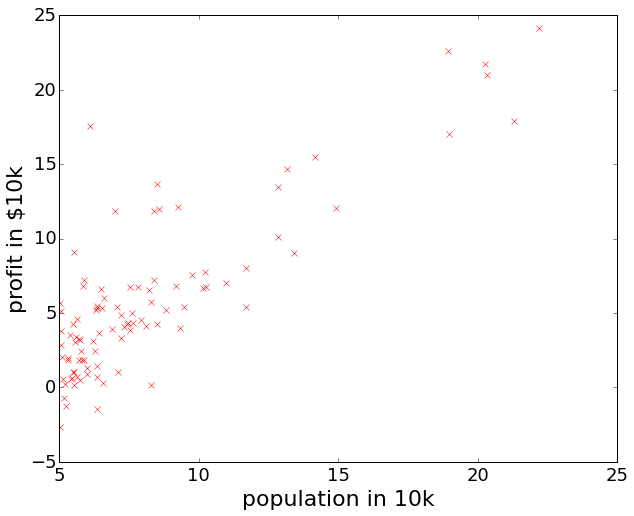

In [7]:
plt.plot(x, y,'rx')
plt.ylabel('profit in $10k')
plt.xlabel('population in 10k')
plt.show()

### Apply Gradient Descent

First write a function for the cost function.  The linear function cost function is:

In [8]:
def cost(X, y, theta):
    m = len(y) # size of training set
    return (1.0/(2*m)) * np.sum(np.power(X*theta.T - y,2))

For the initial step, we assign 

\begin{align}
{\bf \theta} = 
\left(
\begin{array}{cc}
0 & 0 \\
\end{array}
\right)
\end{align}

compute the intial value (should be 37.02 according to notes).

In [9]:
theta = np.matrix([0.0, 0.0])
theta

matrix([[ 0.,  0.]])

In [10]:
j0 = cost(X, y, theta)
j0

32.072733877455676

Now we implement a function to apply gradient descent to find the $\bf \theta$ that minimized the cost fuction.

Gradient descent basically is minimizing the cost function w.r.t to the features vector ${\bf \theta}$.

This is done as follows:

\begin{align}
{\bf \theta} &= {\bf \theta} - \frac{\alpha}{m}\sum_{i=1}^{m}\left({\bf X}{\bf \theta}^T - {\bf y}\right)^T{\bf X}
\end{align}

To see how this works in vectorized operations, look at the dimentions of each object:

\begin{align}
(1 \times F) &= (1 \times F) - \left((T \times F)(1 \times F)^T - (T \times 1)\right)^T(T \times F) \\
             &= (1 \times F) - \left((T \times F)(F \times 1) - (T \times 1)\right)^T(T \times F) \\
             &= (1 \times F) - \left(T \times 1\right)^T(T \times F) \\
             &= (1 \times F) - (1 \times T)(T \times F) \\
             &= (1 \times F)
\end{align}

In [11]:
# test shapes
e = X*theta.T - y
e.T.shape, X.shape, (e.T*X).shape

((1, 97), (97, 2), (1, 2))

In [12]:
def gradient_descent(X, y, theta, alpha, N):
    m = len(y)
    J = np.zeros(N)
    
    # interate
    for n in np.arange(N):
        # compute cost
        J[n] = cost(X, y, theta)
        
        # iterate theta       
        d = (X*theta.T - y).T*X
        theta = theta - (alpha/m)*d
            
    return (theta, J)

Apply Gradient Descent for 1500 iterations and $\alpha = 0.01$

In [13]:
N     = 1500
alpha = 0.01
(theta, J) = gradient_descent(X, y, theta, alpha, N)
np.asarray(theta).ravel()

array([-3.6303,  1.1664])

Plot the cost function versus iteration to ensure it converges:

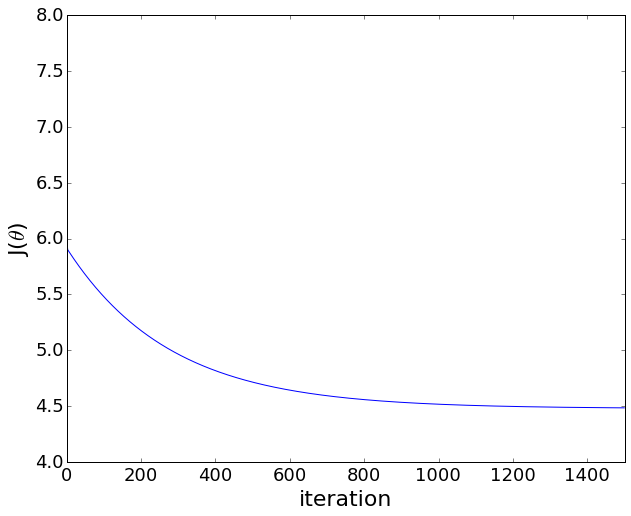

In [14]:
plt.plot(np.arange(N), J)
plt.ylabel('J($\\theta$)')
plt.xlabel('iteration')
plt.axis([0, 1500, 4, 8])
plt.show()

plot the fitted value against the data

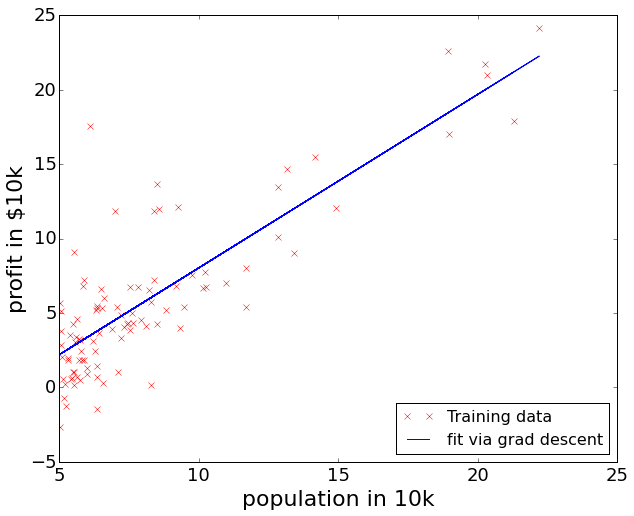

In [15]:
b = theta[0,0]
m = theta[0,1]
h = m*np.asarray(x) + b

plt.plot(x, y, 'rx')
plt.plot(x, h, 'b-')
plt.plot()
plt.ylabel('profit in $10k')
plt.xlabel('population in 10k')
plt.legend(['Training data', 'fit via grad descent'], loc='lower right')
plt.show()

### Visualize $J(\theta)$

compute $J(\theta)$ over the parameter space of ${\bf \theta}$ and visualize

In [16]:
# grid of theta values
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1 ,  4, 100)

# computer J for each (theta0, theta1) pair
J = np.zeros((len(theta0), len(theta1)))
for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        t = np.matrix([[t0, t1]])
        J[i,j] = cost(X, y, t)

In [17]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

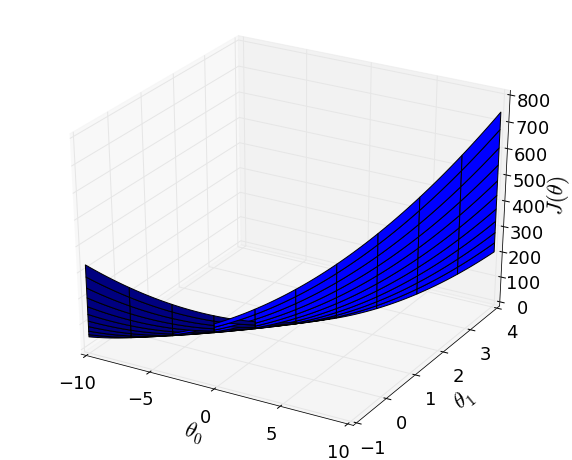

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0, theta1, J)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()

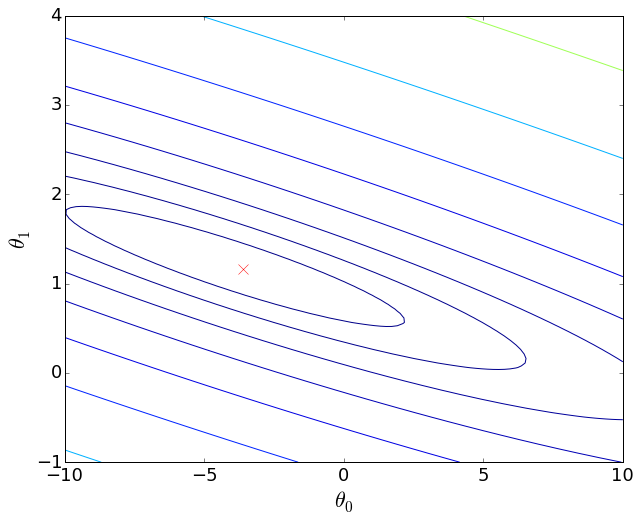

In [19]:
plt.contour(theta0, theta1, J.T, levels=np.logspace(-2, 3, 20))
plt.plot(b, m, 'rx', markersize=10, linewidth=2)
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.show()

## Multiple Features

Now perform fit using multiple features:

* size of the hours in ${\rm ft}^2$
* $\#$ of bedrooms
* price of the house

### Load data

In [20]:
df = pd.read_csv('ex1data2.txt', names=['area', 'nbeds', 'price'])
df.head()

,area,nbeds,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Renormalize the features by:

$$\hat{f} = \frac{f - \mu_f}{\sigma_f}$$

In [21]:
norm_df = (df - df.mean())/(df.std())
norm_df.rename(columns=lambda x: x+'_hat', inplace=True)
norm_df.head()

,area_hat,nbeds_hat,price_hat
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [22]:
# spot check
v = (df.ix[0].area - df.area.mean())/df.area.std()
np.isclose(v, norm_df.ix[0].area_hat) ## == doesn't work for floats

True

In [23]:
## append to original DF
df = df.join(norm_df)
df.head()

,area,nbeds,price,area_hat,nbeds_hat,price_hat
0,2104,3,399900,0.130010,-0.223675,0.475747
1,1600,3,329900,-0.504190,-0.223675,-0.084074
2,2400,3,369000,0.502476,-0.223675,0.228626
3,1416,2,232000,-0.735723,-1.537767,-0.867025
4,3000,4,539900,1.257476,1.090417,1.595389


### perform grad descent

#### perpare inputs

In [24]:
y = np.asmatrix(df.price_hat.values).T
m = len(y)
m, y[0:5,:]

(47, matrix([[ 0.4757],
         [-0.0841],
         [ 0.2286],
         [-0.867 ],
         [ 1.5954]]))

In [25]:
X = np.append(np.ones_like(y), np.asmatrix(df[['area_hat', 'nbeds_hat']]), axis=1)
X[0:5, :]

matrix([[ 1.    ,  0.13  , -0.2237],
        [ 1.    , -0.5042, -0.2237],
        [ 1.    ,  0.5025, -0.2237],
        [ 1.    , -0.7357, -1.5378],
        [ 1.    ,  1.2575,  1.0904]])

In [26]:
theta = np.matrix(np.zeros_like(X[0,:]))
theta

matrix([[ 0.,  0.,  0.]])

### cost

In [27]:
cost(X, y, theta)

0.48936170212765978

### Grad Descent

In [28]:
N     = 500
alpha = 0.01
(theta, J) = gradient_descent(X, y, theta, alpha, N)
np.asarray(theta).ravel()

array([ -1.2340e-16,   8.3038e-01,   8.2398e-04])

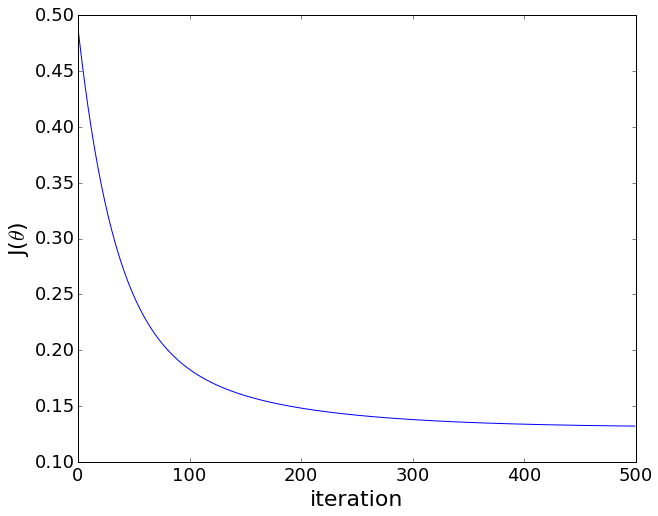

In [29]:
plt.plot(np.arange(N), J)
plt.ylabel('J($\\theta$)')
plt.xlabel('iteration')
plt.show()

#### different learning rates

In [30]:
alphas = np.array([3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001])
alphas

array([  3.0000e+00,   1.0000e+00,   3.0000e-01,   1.0000e-01,
         3.0000e-02,   1.0000e-02,   3.0000e-03,   1.0000e-03])

In [31]:
N      = 100
alphas = np.array([1, 0.3, 0.1, 0.03, 0.01, 0.003])
Js = {}
for a in alphas:
    theta = np.matrix(np.zeros_like(X[0,:]))
    Js[a] = gradient_descent(X, y, theta, a, N)[1]
df_js = pd.DataFrame(Js)
df_js.head()

,0.003,0.01,0.03,0.1,0.3,1.0
0,0.489362,0.489362,0.489362,0.489362,0.489362,0.489362
1,0.486705,0.480549,0.463304,0.406931,0.280043,0.234634
2,0.484070,0.471986,0.439423,0.346172,0.207924,0.160963
3,0.481458,0.463665,0.417528,0.301103,0.178675,0.139552
4,0.478869,0.455578,0.397446,0.267422,0.163968,0.133297


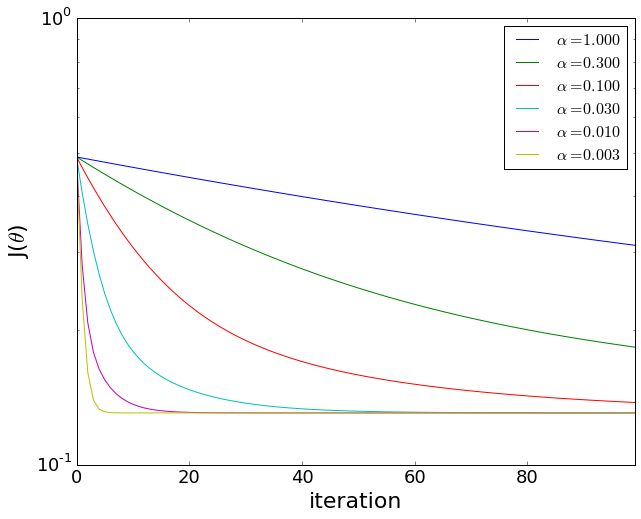

In [32]:
df_js.plot(logy=True)
plt.ylabel('J($\\theta$)')
plt.xlabel('iteration')
plt.legend(['$\\alpha = %1.3f$'%a for a in alphas])
plt.show()

alpha = 0.003 seems to converge the fastest.

In [33]:
N     = 1000
alpha = 0.003
(theta, J) = gradient_descent(X, y, theta, alpha, N)
theta

matrix([[ -1.3877e-16,   7.5182e-01,   7.1331e-02]])

In [34]:
def predict(df, theta, area, nbeds):
    area_hat  = (area - df.area.mean())/df.area.std()
    nbeds_hat = (nbeds - df.nbeds.mean())/df.nbeds.std()
    x         = np.matrix([1.0, area_hat, nbeds_hat])
    price_hat = (x*theta.T).item(0)
    return price_hat*df.price.std() + df.price.mean()

In [35]:
price_grad_descent = predict(df, theta, 1650, 3)
print("Price = $%.0f" % price_grad_descent)

Price = $296935


## Normal Equation

Finally, let's use the analytical solution for linear regression:

\begin{align}
{\bf \theta} = \left({\bf X}^T{\bf X}\right)^{-1}{\bf X}^T{\bf y}
\end{align}

In [36]:
theta = np.linalg.inv(X.T*X)*X.T*y
theta = theta.T
theta

matrix([[ -1.1796e-16,   8.8477e-01,  -5.3179e-02]])

In [37]:
price_analytic = predict(df, theta, 1650, 3)
print("Price = $%.0f" % price_analytic)

Price = $293081


In [38]:
price_rel_diff = (price_analytic - price_grad_descent)/price_analytic 
print("relative difference in price = $%.0f" % price_rel_diff)

relative difference in price = $-0
